# 텍스트 마이닝 (Text Mining)   

텍스트 분석을 위한 패키지 
  * NLTK(Natural Language Toolkit for Python): 아나콘다에 기본적으로 함께 설치되는 자연어 처리 패키지 
  * SpaCy: 속도와 성능이 우수함 
  * Gensim: 토픽 모델링이 강점
  * KoNLPy(Korean Natural Language Processing in Python) 등
  
텍스트 분석 프로세스
* 텍스트 전처리 
  * 데이터 클린징(특수 문자 삭제 등), 토큰화 (tokenization), 불용어 (stopword) 제거, 대소문자 변경, 어간 추출 (stemming), 표제어 추출 (lemmatization) 등
     
* 텍스트 수치화 (Vectorizaiotn)   
  * Bag of Words: 빈도 (Word Count) 또는 단어빈도-역문서빈도 (TF-IDF,  Term Frequency-Inverse Document Frequency) 기반 벡터화 
  * Word2Vec (Word Embedding to Vector): 단어의 유사성을 기반으로 한 벡터화    
* 모델 수립 및 학습/예측/평가 


텍스트 수집 및 관련 분석  
* 텍스트 크롤링 (Crawling)   
* 워드클라우드(Word Cloud) 시각화
* 감성 분석 (sentiment analysis), 토픽 모델링 (topic modeling)
* 문서 군집화, 연관어 분석 등  


*본 실습은 파이썬 머신러닝 완벽 가이드(권철민, 위키북스, 2020), 파이썬 라이브러리를 활용한 머신러닝 (A.Mueller & S.Guido, 박해선 역, 한빛미디어, 2019) 교재 참고


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기

### 영문 텍스트 전처리 

#### 텍스트 클린징
re 모듈을 통해 정규 표현식(특정한 규칙을 가진 문자열의 집합을 표현하는 형식)을 사용함으로써 숫자, 문장부호, 특수 문자 등 제거할 수 있다. 


In [2]:
import re  
# 정규표현식(regular expression)  

text_sample = '@@@@12345%%%%%The Matrix is everywhere its all around us, here even in this room. \
You can see it out your window or on your television. \
You feel it when you go to work, or go to church or pay your taxes.'

# 스페이스, 마침표, 영문 대소문자 제외
p = re.compile("[^ .a-zA-Z]+")
text_sample = p.sub("", text_sample)

# 숫자 제외
p = re.compile("[0-9]+")
text_sample = p.sub("", text_sample)

print(text_sample)

The Matrix is everywhere its all around us here even in this room. You can see it out your window or on your television. You feel it when you go to work or go to church or pay your taxes.


#### 텍스트 토큰화 (tokenization)



In [3]:
import nltk

# nltk.download('all') 
# Punket Tokenizer Models (마침표, 개행 문자 등 단어 사전)을 다운로드 받음
nltk.download('punkt') 

# 문장 토큰화
sentences = nltk.sent_tokenize(text=text_sample) # 3개의 문장으로 이루어진 list를 반환 
print(type(sentences),len(sentences))
print(sentences)

# 단어 토큰화
words = nltk.word_tokenize(text=text_sample)
print(type(words),len(words))
print(words)

# 품사 분석
# nltk.download('averaged_perceptron_tagger')
# tag = nltk.pos_tag(words)
# print(tag)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<class 'list'> 3
['The Matrix is everywhere its all around us here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work or go to church or pay your taxes.']
<class 'list'> 43
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', 'here', 'even', 'in', 'this', 'room', '.', 'You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.', 'You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']


In [4]:
#여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화 만드는 함수 생성
def tokenize_text(text): 
    # 문장별로 분리 토큰
    sentences = nltk.sent_tokenize(text)
    # 분리된 문장별 단어 토큰화
    word_tokens = [nltk.word_tokenize(sentence) for sentence in sentences]
    return word_tokens

#여러 문장들에 대해 문장별 단어 토큰화 수행 
word_tokens = tokenize_text(text_sample)
print(type(word_tokens),len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


#### 불용어 (stopword) 제거, 대소문자 변경
 


In [5]:
nltk.download('stopwords')

print('영어 stop words 갯수:',len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])  #179개 중 20개만 출력

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
영어 stop words 갯수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [6]:
stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제 3개의 문장별로 얻은 word_tokens list 에 대해 stop word 제거 Loop
for sentence in word_tokens:
    filtered_words=[]
    # 개별 문장별로 tokenize된 sentence list에 대해 stop word 제거 Loop
    for word in sentence:
        #소문자로 모두 변환
        word = word.lower()  # 대문자: upper()
        # tokenize 된 개별 word가 stop words 들의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
    
print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', 'go', 'church', 'pay', 'taxes', '.']]


#### 어간 추출 (stemming), 표제어 추출 (lemmatization)

* 어간 추출:  PorterStemmer, LancasterStemmer, Snowball Stemmer 등 이용 
* 표제어 추출: WordNetLemmatizer 등 이용 
  * 표제어(lemma, 단어의 원형)를 찾을 때 단어의 품사를 지정하여 찾기 때문에 어간 추출보다 정교하다. 
  * 품사(pos: part of speech) 옵션을 명사(n, 기본 옵션), 동사(v), 형용사(a), 부사(r) 등으로 지정할 수 있다. 
  * WordNetLemmatizer를 사용하려면 WordNet이 계산한 형태소를 참조해 문장에서 단어나 표현을 인식하므로 인터넷에 연결되어 있어야 한다. 

In [7]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

print("PorterStemmer 결과:")
print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

PorterStemmer 결과:
work work work
amus amus amus
happier happiest
fancier fanciest


In [8]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print("LancasterStemmer 결과:")
print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

LancasterStemmer 결과:
work work work
amus amus amus
happy happiest
fant fanciest


In [9]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemma = WordNetLemmatizer()
print("WordNetLemmatizer 결과:")
print(lemma.lemmatize('working','v'),lemma.lemmatize('works','v'),lemma.lemmatize('worked','v'))
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
WordNetLemmatizer 결과:
work work work
amuse amuse amuse
happy happy
fancy fancy


#### 단어 빈도 분석 및 워드클라우드 시각화

In [10]:
# 단어 빈도 분석
from collections import Counter 

words = nltk.word_tokenize(text=text_sample)
print(words)

vocab = Counter(words)
print(vocab)

['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', 'here', 'even', 'in', 'this', 'room', '.', 'You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.', 'You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']
Counter({'.': 3, 'your': 3, 'or': 3, 'You': 2, 'it': 2, 'go': 2, 'to': 2, 'The': 1, 'Matrix': 1, 'is': 1, 'everywhere': 1, 'its': 1, 'all': 1, 'around': 1, 'us': 1, 'here': 1, 'even': 1, 'in': 1, 'this': 1, 'room': 1, 'can': 1, 'see': 1, 'out': 1, 'window': 1, 'on': 1, 'television': 1, 'feel': 1, 'when': 1, 'you': 1, 'work': 1, 'church': 1, 'pay': 1, 'taxes': 1})


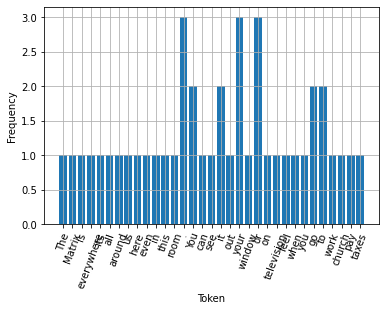

In [11]:
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.grid(True)

plt.bar(range(len(vocab)),vocab.values(), align='center')
plt.xticks(range(len(vocab)), vocab, rotation='70')

plt.show()

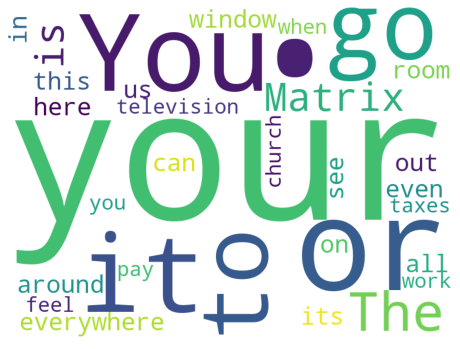

In [12]:
# 워드클라우드 시각화
from wordcloud import WordCloud

wc = WordCloud(width=800, height=600, background_color = "white")
wc = wc.generate_from_frequencies(vocab)
fig = plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

## 텍스트 수치화 (Vectorizaiotn)   
  

### Bag of Words: 단어 빈도수 기반

In [13]:
bards_words =["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

# 텍스트를 BOW로 표현하기 - 단어의 빈도수 기반
from sklearn.feature_extraction.text import CountVectorizer  
vect = CountVectorizer()  
print(vect)
# 기본 파라미터: ngram_range =(1,1) 토큰 하나(monogram)를 단어로 사용, lowercase = True 모든 단어를 소문자로 변경
# tokenizer=nltk.word_tokenize nltk 형태소 분석을 사용 가능 


# 문서별 단어를 정수로 매핑하고, 단어의 빈도 수를 희소행렬(sparse martrix)로 변환
# fit: 텍스트를 토큰으로 나누고 어휘 사전 구축 
# transform: 단어의 빈도수를 희소 행렬(Sparse Matrix)의 CSR (Compressed Sparse Row) 형식으로 저장
bag_of_words = vect.fit_transform(bards_words)
 
print(repr(bag_of_words))
print(bag_of_words)

# CSR 형식은 COO(COOrdinate) 형식과는 다르게 행 압축 정보 이용
# [최초 시작 행번호, 시작 행에서의 데이터 누적 개수, 두번째 행에서의 데이터 누적 개수,..., 마지막 행에서의 데이터 누적개수]

CountVectorizer()
<2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>
  (0, 9)	1
  (0, 3)	1
  (0, 2)	1
  (0, 10)	1
  (0, 4)	1
  (0, 6)	1
  (0, 12)	1
  (1, 9)	1
  (1, 3)	1
  (1, 12)	1
  (1, 1)	1
  (1, 8)	1
  (1, 7)	1
  (1, 5)	1
  (1, 11)	1
  (1, 0)	1


In [14]:
# 어휘 사전: 모든 문서에 나타난 모든 단어의 어휘를 모아 번호를 매김 (알파벳순)
print("어휘 사전의 크기:", len(vect.vocabulary_))
print("어휘 사전의 내용:", vect.vocabulary_)  
print(vect.get_feature_names()) 
print(bag_of_words.toarray())

어휘 사전의 크기: 13
어휘 사전의 내용: {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Bag of Words: TF-IDF 기반


In [15]:
# 텍스트를 BOW로 표현하기 - TF-IDF 기반
from sklearn.feature_extraction.text import TfidfVectorizer  

vect = TfidfVectorizer()
print(vect)
bag_of_words = vect.fit_transform(bards_words)

print("어휘 사전의 크기:", len(vect.vocabulary_))
print("어휘 사전의 내용:", vect.vocabulary_)  
print(vect.get_feature_names())  
print(bag_of_words.toarray())

TfidfVectorizer()
어휘 사전의 크기: 13
어휘 사전의 내용: {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']
[[0.         0.         0.42567716 0.30287281 0.42567716 0.
  0.42567716 0.         0.         0.30287281 0.42567716 0.
  0.30287281]
 [0.36469323 0.36469323 0.         0.25948224 0.         0.36469323
  0.         0.36469323 0.36469323 0.25948224 0.         0.36469323
  0.25948224]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Bag of Words: n-그램, 토큰 빈도수, 불용어 고려 
여러 개의 토큰(bigram, trigram, n-gram)을 함께 고려하여 전체 문맥을 반영할 수 있도록 한다. 
  * 하나의 토큰만 고려한다면 다음 두 문장은 전혀 다른 내용이지만 동일한 결과를 얻게 된다. 
      * it's bad, not good at all vs. it's good, not bad at all 
  * CountVectorizer와 TfidfVectorizer의 파라미터 설정 
      * ngram_range = (토큰의 최소 길이, 최대 길이)

BOW 생성시 토큰 빈도수, 불용어 삭제, 어근 추출 등이 가능하다. 
  * min_df, max_df = 전체 문서 내 토큰의 최소, 최대 개수 기준
  * stop_words = 사용자가 직접 정의 또는 NLTK, CountVectorizer에서 제공하는 자체 불용어 사용 가능 
  * tokenizer : 별도의 함수를 만들어 어간 추출 등을 수행 가능 

In [16]:
bards_words =["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

# n-gram (bi, trigram) 포함 
vect = CountVectorizer(ngram_range=(2,3))  
bag_of_words = vect.fit_transform(bards_words)

print("어휘 사전의 크기:", len(vect.vocabulary_))
print("어휘 사전의 내용:", vect.vocabulary_)  
print(vect.get_feature_names())  
print(bag_of_words.toarray())

어휘 사전의 크기: 26
어휘 사전의 내용: {'the fool': 16, 'fool doth': 5, 'doth think': 3, 'think he': 20, 'he is': 7, 'is wise': 11, 'the fool doth': 17, 'fool doth think': 6, 'doth think he': 4, 'think he is': 21, 'he is wise': 8, 'but the': 1, 'the wise': 18, 'wise man': 24, 'man knows': 14, 'knows himself': 12, 'himself to': 9, 'to be': 22, 'be fool': 0, 'but the wise': 2, 'the wise man': 19, 'wise man knows': 25, 'man knows himself': 15, 'knows himself to': 13, 'himself to be': 10, 'to be fool': 23}
['be fool', 'but the', 'but the wise', 'doth think', 'doth think he', 'fool doth', 'fool doth think', 'he is', 'he is wise', 'himself to', 'himself to be', 'is wise', 'knows himself', 'knows himself to', 'man knows', 'man knows himself', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think he', 'think he is', 'to be', 'to be fool', 'wise man', 'wise man knows']
[[0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
# 불용어를 사용자가 직접 정의하여 필터링 가능 
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])  
bag_of_words = vect.fit_transform(bards_words)

print("어휘 사전의 크기:", len(vect.vocabulary_))
print("어휘 사전의 내용:", vect.vocabulary_)  
print(vect.get_feature_names())  
print(bag_of_words.toarray())

어휘 사전의 크기: 11
어휘 사전의 내용: {'fool': 3, 'doth': 2, 'think': 8, 'he': 4, 'wise': 10, 'but': 1, 'man': 7, 'knows': 6, 'himself': 5, 'to': 9, 'be': 0}
['be', 'but', 'doth', 'fool', 'he', 'himself', 'knows', 'man', 'think', 'to', 'wise']
[[0 0 1 1 1 0 0 0 1 0 1]
 [1 1 0 1 0 1 1 1 0 1 1]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
#CountVectorizer에서 제공하는 자체 불용어 사용 가능
vect = CountVectorizer(stop_words="english")
bag_of_words = vect.fit_transform(bards_words)

print("어휘 사전의 크기:", len(vect.vocabulary_))
print("어휘 사전의 내용:", vect.vocabulary_)  
print(vect.get_feature_names())  
print(bag_of_words.toarray())

어휘 사전의 크기: 6
어휘 사전의 내용: {'fool': 1, 'doth': 0, 'think': 4, 'wise': 5, 'man': 3, 'knows': 2}
['doth', 'fool', 'knows', 'man', 'think', 'wise']
[[1 1 0 0 1 1]
 [0 1 1 1 0 1]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
# NLTK에서 제공하는 자체 불용어 사용 가능
import nltk
nltk.download('stopwords')

sw = nltk.corpus.stopwords.words('english')
vect = CountVectorizer(stop_words =sw)
bag_of_words = vect.fit_transform(bards_words)

print("어휘 사전의 크기:", len(vect.vocabulary_))
print("어휘 사전의 내용:", vect.vocabulary_)  
print(vect.get_feature_names())  
print(bag_of_words.toarray()) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
어휘 사전의 크기: 6
어휘 사전의 내용: {'fool': 1, 'doth': 0, 'think': 4, 'wise': 5, 'man': 3, 'knows': 2}
['doth', 'fool', 'knows', 'man', 'think', 'wise']
[[1 1 0 0 1 1]
 [0 1 1 1 0 1]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 모델 수립 및 학습/예측/평가
* 영화 리뷰 데이터를 이용하여 긍정/부정 분류 모델을 만들고 평가
* 데이터 원본: http://kaggle.com/c/word2vec-nlp-tutorial/data


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import pandas as pd

# csv 데이터 가져오기, header=0 (첫번째 행은 컬럼 이름), quoting=3 (큰 따옴표 무시)
review_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BigMining/labeledTrainData.tsv", header=0, sep="\t", quoting=3)  

display(review_df.info())      # 25,000개의 리뷰 데이터, 3개 변수 (결측치 없음)  
display(review_df.head(3))     # 처음 3행 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


None

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


In [22]:
display(review_df['review'][0])   

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

In [23]:
import re

# <br> html 태그는 replace 함수로 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br />',' ')

# 파이썬의 정규 표현식 모듈인 re를 이용하여 영어 문자열이 아닌 문자는 모두 공백으로 변환 
review_df['review'] = review_df['review'].apply( lambda x : re.sub("[^a-zA-Z]", " ", x) )

display(review_df['review'][0])   

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay   Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him   The actual feature film bit when it finally starts is only on for 

In [24]:
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment']
feature_df = review_df.drop(['id','sentiment'], axis=1, inplace=False)

X_train, X_test, y_train, y_test= train_test_split(feature_df, class_df, test_size=0.25, random_state=156)

X_train.shape, X_test.shape

((18750, 1), (6250, 1))

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# stop words는 English, filtering, ngram은 (1,2)로 설정해 CountVectorization수행 
cnt_vect = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=100)  # 토큰이 나타날 최소 문서 개수 100
X_train_cnt_vect = cnt_vect.fit_transform(X_train['review'])
X_test_cnt_vect = cnt_vect.transform(X_test['review'])

print('학습용 데이터 Text의 CountVectorizer Shape:',X_train_cnt_vect.shape)
print('시험용 데이터 Text의 CountVectorizer Shape:',X_test_cnt_vect.shape)

학습용 데이터 Text의 CountVectorizer Shape: (18750, 3066)
시험용 데이터 Text의 CountVectorizer Shape: (6250, 3066)


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_cnt_vect, y_train)
pred = rf.predict(X_test_cnt_vect)

print('Count Vectorized RandomForest의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

Count Vectorized RandomForest의 예측 정확도: 0.8368


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=100 )
X_train_tfidf_vect = tfidf_vect.fit_transform(X_train['review'])
X_test_tfidf_vect = tfidf_vect.transform(X_test['review'])

print('학습용 데이터 Text의 TF-IDF Vectorizer Shape:',X_train_tfidf_vect.shape)
print('시험용 데이터 Text의 TF-IDF Vectorizer Shape:',X_test_tfidf_vect.shape)

rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_tfidf_vect, y_train)
pred = rf.predict(X_test_tfidf_vect)

print('TF-IDF Vectorized RandomForest의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

학습용 데이터 Text의 TF-IDF Vectorizer Shape: (18750, 3066)
시험용 데이터 Text의 TF-IDF Vectorizer Shape: (6250, 3066)
TF-IDF Vectorized RandomForest의 예측 정확도: 0.8387


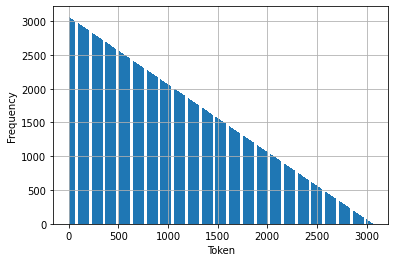

In [28]:
# 단어 빈도 분석
wordInfo = dict()

res = sorted(cnt_vect.vocabulary_.items(), reverse=True)
#res = sorted(cnt_vect.vocabulary_.items(), reverse=True)[:20]
#print(res)

for key, v in res: 
    if (len(str(key)) > 1):
      wordInfo[key] = v

plt.xlabel('Token')
plt.ylabel('Frequency')
plt.grid(True)
    
Sorted_Dict_Values = sorted(wordInfo.values(), reverse=True)
Sorted_Dict_Keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
plt.bar(range(len(wordInfo)), wordInfo.values(), align='center')
#plt.xticks(range(len(wordInfo)), list(Sorted_Dict_Keys), rotation='70')
#plt.ylim(ymin=3000, ymax=3080)
plt.show()

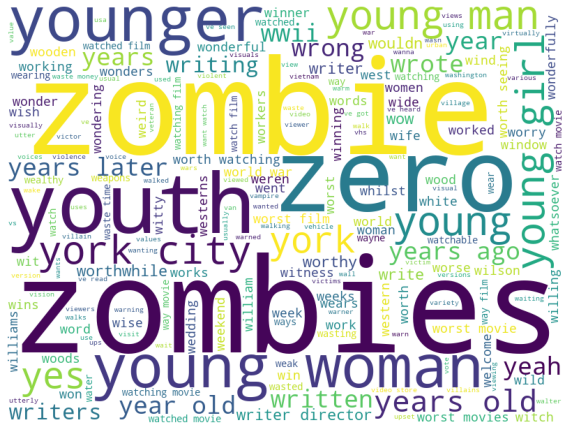

In [29]:
# 워드클라우드 시각화
from wordcloud import WordCloud

wc = WordCloud(width=800, height=600, background_color = "white")
wc = wc.generate_from_frequencies(dict(cnt_vect.vocabulary_.items()))
fig = plt.figure(figsize=(10,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

# 한글 텍스트 분석

0. 한글폰트 준비
1. 네이버 영화 리뷰 데이터 크롤링
  - TOP 50 영화 이름, 영화 코드, 평점 수집
  - 각 영화의 리뷰 데이터 수집 
2. 영화 리뷰 감성 분석 
3. 워드 클라우드 만들기
4. 토픽 모델링 (topic modeling)

## 0 한글폰트 준비


In [30]:
# 한글 폰트(나눔고딕) 설치 및 적용
!apt-get update -qq
!apt-get install fonts-nanum* -qq              # 나눔 폰트 설치

In [1]:
# 폰트를 적용하기 위해서는 상단 메뉴 "런타임> 런타임 다시 시작하기" 실행
%matplotlib inline
import matplotlib as mpl               # 기본 설정
import matplotlib.pyplot as plt        # 그래프 관련
import matplotlib.font_manager as fm   # 폰트 관련

#mpl.rcParams['axes.unicode_minus'] = False  ## 마이너스 부호가 깨지는 것 방지 
# 설치된 나눔글꼴중 원하는 폰트의 전체 경로 가져오기 
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)
fm._rebuild()  # 폰트 적용

NanumGothic Eco


## 1 네이버 영화 리뷰 데이터 크롤링

수집하고자 하는 문서 
- 특정 날짜의 TOP 50 영화 목록: https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20220511
- 각 영화의 리뷰와 평점: https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=17170&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=1  

BeautifulSoup 
- HTML 또는 XML 문서로부터 데이터를 뽑아내기 위한 파이썬 라이브러리
- https://www.crummy.com/software/BeautifulSoup/bs4/doc/ 

In [32]:
!pip install requests beautifulsoup4 lxml

In [2]:
# 웹크롤링에 필요한 패키지 설치 
import requests  # 서버와의 통신을 위한 패키지
from bs4 import BeautifulSoup  # 서버에서 받아온 정보를 파싱하는데 사용하는 패키지
import pandas as pd    # 데이터 프레임을 다루기 위한 패키지
import numpy as np
import random, csv, time

In [3]:
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20220511'
response= requests.get(url)
source = response.text

soup = BeautifulSoup(source, 'html.parser')  #문서 해석하는 프로그램(parser)로서 주로 이용되는 패키지:lxml

top_list = soup.find_all("div","tit5")
movie_name = [i.a.string for i in top_list]
print(movie_name)

['씽2게더', '극장판 귀멸의 칼날: 무한열차편', '극장판 주술회전 0', '피아니스트의 전설', '벤허', '코다', '피의 연대기', '비긴 어게인', '중경삼림', '화양연화', '찬실이는 복도 많지', '바닷마을 다이어리', '귀향', '배드 가이즈', '세자매', '안경', '라라랜드', '공기살인', '나쁜 교육', '아비정전', '드라이브 마이 카', '모가디슈', '신은 죽지 않았다 3: 어둠 속의 빛', '어나더 라운드', '수퍼 소닉2', '이상한 나라의 수학자', '빅 아이즈', '언어의 정원', '문라이즈 킹덤', '루이스 웨인: 사랑을 그린 고양이 화가', '날씨의 아이', '한여름의 판타지아', '니 부모 얼굴이 보고 싶다', '스펜서', '봄날', '미나리', '디어 에반 핸슨', '아사코', '닥터 스트레인지: 대혼돈의 멀티버스', '앵커', '신비한 동물들과 덤블도어의 비밀', '불한당: 나쁜 놈들의 세상', '로스트 시티', '노회찬6411', '서울괴담']


In [4]:
movie_code = [i.a['href'].split('?')[1].replace('code=','') for i in top_list] #코드만 추출
print(movie_code)

['187320', '196051', '213733', '29059', '10058', '201073', '164104', '96379', '17059', '28876', '189624', '132610', '49302', '196047', '193328', '69024', '134963', '196362', '39368', '10546', '205623', '192150', '172344', '194813', '212095', '190991', '81464', '106335', '90537', '193961', '181114', '130342', '159812', '207921', '204650', '187310', '207940', '172145', '182016', '190374', '164122', '154112', '212098', '195986', '215791']


In [5]:
score_list= soup.find_all('td', 'point')
movie_score = [i.string for i in score_list]
print(movie_score)

['9.39', '9.27', '9.26', '9.25', '9.23', '9.14', '9.09', '9.04', '8.90', '8.81', '8.77', '8.73', '8.67', '8.67', '8.67', '8.64', '8.62', '8.60', '8.46', '8.45', '8.41', '8.33', '8.32', '8.30', '8.29', '8.25', '8.21', '8.18', '8.12', '7.97', '7.96', '7.80', '7.72', '7.71', '7.69', '7.57', '7.46', '7.28', '7.27', '7.22', '6.55', '6.50', '6.17', '6.05', '4.58']


In [6]:
movie = pd.DataFrame({'code' : movie_code, 'name': movie_name, 'score' : movie_score})
movie['score'] = movie['score'].astype(float)
movie.info()
movie.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    45 non-null     object 
 1   name    45 non-null     object 
 2   score   45 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.2+ KB


,code,name,score
0,187320,씽2게더,9.39
1,196051,극장판 귀멸의 칼날: 무한열차편,9.27
2,213733,극장판 주술회전 0,9.26
3,29059,피아니스트의 전설,9.25
4,10058,벤허,9.23


In [7]:
movie.tail()

,code,name,score
40,164122,신비한 동물들과 덤블도어의 비밀,6.55
41,154112,불한당: 나쁜 놈들의 세상,6.50
42,212098,로스트 시티,6.17
43,195986,노회찬6411,6.05
44,215791,서울괴담,4.58


In [8]:
# 네이버 영화 리뷰 
#base_url = "https://movie.naver.com/movie/bi/mi/review.nhn?code={}&page={}"
#base_url = "https://movie.naver.com/movie/point/af/list.nhn?sword={}&page={}"
base_url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code={}&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={}"


mv_score =[]
mv_rev = []
mv_name =[]

#for i in movie_code :
tmp = [movie_code[0]] # 187320	씽2게더, 시간상 가장 상위에 링크된 하나의 영화만 분석
for i in tmp : 
 
  for j in range(1, 4) :  # 3 페이지를 분석 
    url = base_url.format(i, j) 
    print(url)

    # html 소스 가져오기
    res = requests.get(url)
    
    # 규칙적인 URL 접속 작업이 반복되면 네이버 접속 거부당하므로 랜덤한 시간차를 두고 URL에 접속
    rand_sec = random.uniform(0.2, 0.4)  #균등분포
    time.sleep(rand_sec) # 잠깐 휴식 

    if res.status_code == 200 :  ##문제가 없다면 

        # html 파싱
        soup = BeautifulSoup(res.text, 'html.parser')
     
        # 리뷰 가져오기
        review_list =[]   
        for k in range(0, 10):
          review = soup.find('span',{'id':f'_filtered_ment_{k}'})
          review = review.text.strip() 
          review_list.append(review)

        # 점수 가져오기    
        scores = soup.find_all('div', {'class':'star_score'})
        score_list = [tag.em.text for tag in scores]
           
        # 다양한 방법으로 원하는 데이터를 가져올 수 있음
        #  soup.select('table.list_netizen > tbody > tr > td.title')
        #  soup.find("a")["href"].strip()

        mv_score = mv_score + score_list
        mv_rev = mv_rev + review_list

        print(review_list)
        print(score_list)

        # 영화 이름 가져오기    
        for k in range(0, 10):
            mv_name.append(movie['name'][movie['code']== i].values[0])


https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=187320&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=1
['가슴이 웅장해진다 미스터문ㅜ 성공했다', '생각보다 재밌게 봤네요. 개인적으로 조니 음악과 마지막 곡이 제일 좋았어요. 의외로 감동포인트도 있네요. 눈물 찔끔ㅠ 한 번 더 보고싶어요.', '개인적으로 1편보다 더 좋았음.. 노래도 영화에 어울리게 선곡 잘한 것 같아요!', '아침 조조로 봤는데 이번편도 재밌네요 노래도 좋았다', '전편보다 훨씬 발전한 2편. 노래 진짜 좋음.', '느슨한 영화계에 긴장감을 주는 영화', '시간가는 줄 모르게 관람했어요.', '믿고 듣는 씽! 노래가 너무 좋아요', '내용 노래 감동 최고네요~', '아들과 너무 재미있게 봤습니다']
['10', '10', '10', '10', '8', '10', '9', '10', '10', '10']
https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=187320&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=2
['뻔한 이야기지만, 남녀노소 할 것 없이 즐거운 시간을 시간을 선사해주는 흥겨운 애니메이션, 왠지 모르게 뭉클한 것은 왜일까', '입이 떡 벌어지는 공연 연출에 감탄했습니다. 새해 첫 영화로 최고의 선택이었네요.', '최고예요!!!! 진부하지 않아요ㅠㅠㅠ', 'n차 관람 예정! 노래 듣다 울컥울컥 하는데 다 보고 나면 기분 좋아지는 영화', '문버스터 고생했다..ㅠㅠㅠㅠ 너무너무너무 재밌게봤습니다', '씽1보다 재밌었어요3도

In [9]:
# 용이한 데이터 관리를 위해 각 리뷰별 아이디를 생성하여 부여
id = []
for k in range(1, len(mv_rev)+1):
    n = "M" + '{0:04d}'.format(k)
    id.append(n)

result = pd.DataFrame({'rev_id' : id, 'movie_name': mv_name, 'score' : mv_score, 'review': mv_rev})
result.info()
display(result.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rev_id      30 non-null     object
 1   movie_name  30 non-null     object
 2   score       30 non-null     object
 3   review      30 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


,rev_id,movie_name,score,review
25,M0026,씽2게더,10,"화려한 콘서트에 초대 받은 기분, 즐거운 시간이었다."
26,M0027,씽2게더,10,최고! 눈과 귀가 즐거운 영화
27,M0028,씽2게더,9,연기만 잘했다면 포르샤가 탑급주연
28,M0029,씽2게더,10,아침 조조로 봤는데 기대보다 재밌었어요 OST도 훌륭하고 개인적으로 씽1보다 더 재...
29,M0030,씽2게더,10,1편처럼 신나는 노래들의 향연


## 2 영화 리뷰 감성 분석 

영화 리뷰 텍스트를 토큰화 하고 긍정/부정 여부를 판정함 

- KoNLPy 형태소 분석기 이용 
  - Okt(Open Korea Text, 트위터에서 만든 오픈소스 한국어 처리기로 이전에는 Twitter라는 이름으로 사용됨), 메캅(Mecab), 코모란(Komoran), 한나눔(Hannanum), 꼬꼬마(Kkma)
  - 성능비교:  https://konlpy-ko.readthedocs.io/ko/v0.4.3/morph/#pos-tagging-with-konlpy

- 불용어 리스트는 직접 만들어서 사용 
  - https://www.ranks.nl/stopwords/korean

- 감성 사전 (스노우보드에서 polarity.csv 화일을 다운로드 받아 BigMining 폴더에 업로드하기)
  - KOSAC (한국어감성분석코퍼스)의 lexicon 데이터 중 일부 한국어 감정 어휘 목록 
  - http://word.snu.ac.kr/kosac/lexicon.php 


vs. 영문 텍스트의 감성 분석
  - Bing Liu’s lexicon, MPQA subjectivity lexicon, Pattern lexicon, TextBlob lexicon, AFINN lexicon,SentiWordNet lexicon, VADER lexicon

In [41]:
# 설치 시 [bs4] 에러가 떠도 무시하시고 진행해주세요. -> !중요 Restart Runtime을 누르지 말아주세요
!pip install konlpy #Konlpy 설치

In [10]:
# 한글 분석을 위한 패키지
from konlpy.tag import Okt #twitter 형태소 분석기

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# 부정점수: 중립점수: 긍정점수' 형식의 감정 사전 (lexicon) 만들기
lexicon = dict()

with open('/content/drive/My Drive/Colab Notebooks/BigMining/polarity.csv', 'r', encoding='utf-8-sig') as polarity:
    next(polarity) # csv 파일에서 첫 행(컬럼 이름) 건너뛰기
    for line in csv.reader(polarity):
        key = str()
        for word in line[0].split(';'):
            key += word.split('/')[0]

        lexicon[key] = {'Neg': line[3], 'Neut': line[4], 'Pos': line[6]}

print(lexicon)       

{'가*': {'Neg': '0', 'Neut': '0', 'Pos': '1'}, '가*있': {'Neg': '0', 'Neut': '0', 'Pos': '1'}, '가*있었': {'Neg': '0', 'Neut': '0', 'Pos': '1'}, '가*ㄴ다*': {'Neg': '0', 'Neut': '0', 'Pos': '1'}, '가': {'Neg': '0.333333333', 'Neut': '0', 'Pos': '0.555555556'}, '가되': {'Neg': '0.363636364', 'Neut': '0.272727273', 'Pos': '0.363636364'}, '가되ㄴ': {'Neg': '0', 'Neut': '1', 'Pos': '0'}, '가되ㄹ': {'Neg': '0', 'Neut': '1', 'Pos': '0'}, '가되어': {'Neg': '1', 'Neut': '0', 'Pos': '0'}, '가되어야지요': {'Neg': '0', 'Neut': '0', 'Pos': '1'}, '가아니': {'Neg': '0.666666667', 'Neut': '0.166666667', 'Pos': '0.166666667'}, '가아니ㄴ가': {'Neg': '1', 'Neut': '0', 'Pos': '0'}, '가아니면': {'Neg': '0', 'Neut': '0', 'Pos': '1'}, '가아니ㅂ니다': {'Neg': '1', 'Neut': '0', 'Pos': '0'}, '가가능': {'Neg': '0', 'Neut': '0', 'Pos': '1'}, '가가능하': {'Neg': '0', 'Neut': '0', 'Pos': '1'}, '가가장': {'Neg': '1', 'Neut': '0', 'Pos': '0'}, '가가장많이': {'Neg': '1', 'Neut': '0', 'Pos': '0'}, '가가장어렵': {'Neg': '1', 'Neut': '0', 'Pos': '0'}, '가굵': {'Neg': '0', 'Neut': '0', 

In [12]:
# 텍스트 토큰화 작업 함수 
def get_token(text):
    pos = []
    tokenizer = Okt() #twitter 형태소 분석기를 불러옵니다.
    if isinstance(text, float) == True: # 주어진 텍스트가 공백일 시 건너뜁니다.
        tokens = "Nothing"
    else:
        tokens = tokenizer.pos(text) 

        # pos : 품사 태깅(Part-of-speech tagging) (예) ('고질라', 'Noun'), ('VS', 'Alpha'), ('.', 'Punctuation')
        # morphs : 형태소 추출 (예) '마지막', '남은', '타이탄', '급', '괴수', '들'
        # nouns : 명사 추출 (예) '마지막', '타이탄', '괴수', '대결', '지구', '하나'

        
    tags = ['Noun', 'Adjective', 'Verb', 'Adverb'] #형태소 중 명사, 형용사, 동사, 부사만 수집
    
    #불용어 정의: 문장에서 내용을 나타내는데 큰 역할을 하지 않은 기능어. 
    stop_words = ["등", "이", "하", "않", "있", "대하", "하지만", "지", "일", "속", "하", "되", "정책", "및", "한국판", "한국", "오",
                 "서", "있다", "것", "되었습니다", "하는", "한다", "했다", "주", "하였습니다", "대", "했습니다", "하여", "해보세요",
                  "있는", "입니다", "있음", "되거나", "할", "있는", "관련", "뉴딜", "해", "패","시브",
                  "월", "화", "수","목", "금", "토", "일", "를", "나", "그", "위", "고","와", "하며", "의", "가",
                 "하겠습니다", "린리", "해야", "몇", "는", "전", "이를","하고", '시킵니다', '위별', '된', '있습니다', '제',
                 "있는데요", "있는데", "볼", "로", "은", "총", "우","보였다", "하기", "후", "간", "이번", "이준", "때","원",
                 "합시다", "중", "과", "저","분","방","임", "된다","날","함", "있으며","개", "될","며", "보자","합니다","안녕하세요",
                 "같습니다","확","진자","조","다", "스","가를", "얜","얘", "경우", "무엇","대한","내용", "위해", "이후","현재", "보시","비대",
                 "우리", "없는", "모두","관","내","때문","어떻게","어디", "세", "사","회", "미","에이","데","이콘", "료", "게시","물", "그린",
                 "디지털", "한", "꾸준히", "하겠다", "리","두었다", "또한", "들어","통해", "바란다", "다음"," 이어",
                 "됨", "됨", "됌", "또", "됐다", "촬용", "분야", "발표", "매일", "점","출처", "기반", "예정", 
                  "오전", "계획", "오늘", "정부", "더", "마감", "분야", "상","뜻", "특징", "업계", "크게","하나", 
                 "콤", "재", "해서", "같다", "곳", "역시","라며", "처", "첫", "요", "보면", "창", "출", "번", "각각", "예", "홍","남기","겸",
                 "이어", "정", "보기", "워", "황", "령","넨", '사업', '산업', '기업']
    
    for token in tokens:
        if not tokens == "Nothing":
          if token[1] in tags:
            if not token[0] in stop_words: #불용어 제외 
              pos.append(token[0])  #토큰 수집
        else:
           continue

    return pos

In [13]:
#감성분석 함수 정의
def get_sentiment(token_list):
    cnt = 0 # 평균을 내기 위해 토큰 개수 계산
    pos = 0
    neut = 0
    neg = 0
    sentiment = None
    for token in token_list:
        try:
            #lexicon에 토큰이 없으면 건너뜀
            pos += float(lexicon[token]["Pos"]) # 토큰들의 긍정점수를 구해서 더함 
            neut += float(lexicon[token]["Neut"]) # 토큰들의 중립점수를 구해서 더함
            neg += float(lexicon[token]["Neg"]) # 토큰들의 부정점수를 구해서 더함
            cnt += 1
        except:
            continue
            
    if not cnt == 0:   
        pos = pos/cnt # 게시글의 긍정점수 평균 
        neut = neut/cnt # 게시글의 중립점수 평균 
        neg = neg/cnt # 게시글의 부정점수 평균 

        # 논리구조를 통해 게시글의 최종 감성을 판정 
        # 긍정/중립/부정 점수를 비교해서 가장 높은 점수의 감성을 게시글의 감성으로 판정
        if pos > neg:
            if pos > neut:
                sentiment = "positive"
            else:
                sentiment = "neutral"
        elif pos < neg:
            if neg > neut:
                sentiment = "negative"
            else:
                sentiment = "neutral"
        else:
            if pos > neut:
                sentiment = "positive and negative"
            else:
                sentiment = "neutral"   
                
        return pos, neut, neg, sentiment
    else: 
        return [None, None, None, None]

In [14]:
# 감정 분석 결과: 새로운 열 5개 추가
# tokens: 텍스트 토큰화 결과
# pos/nuet/neg: 긍정, 중립, 부정 점수
# sentiment: 최종 감성 평가 결과

result["tokens"] = None
result["pos"] = None
result["neut"] = None
result["neg"] = None
result["sentiment"] = None 
 
for i in range(0, len(result)):
    token_list = get_token(result["review"][i])
    result["pos"][i], result["neut"][i], result["neg"][i], result["sentiment"][i] = get_sentiment(token_list)
    result["tokens"][i] = token_list

result.info()
display(result.head())

#csv 파일로 저장하기
file_name = "/content/drive/My Drive/Colab Notebooks/BigMining/movie_sentiment.csv"
result.to_csv(file_name, index = False, encoding = "utf-8-sig")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rev_id      30 non-null     object
 1   movie_name  30 non-null     object
 2   score       30 non-null     object
 3   review      30 non-null     object
 4   tokens      30 non-null     object
 5   pos         30 non-null     object
 6   neut        30 non-null     object
 7   neg         30 non-null     object
 8   sentiment   30 non-null     object
dtypes: object(9)
memory usage: 2.2+ KB


,rev_id,movie_name,score,review,tokens,pos,neut,neg,sentiment
0,M0001,씽2게더,10,가슴이 웅장해진다 미스터문ㅜ 성공했다,"[가슴, 웅장, 해진다, 미스터, 문, 성공했다]",0.2,0.35,0.35,neutral
1,M0002,씽2게더,10,생각보다 재밌게 봤네요. 개인적으로 조니 음악과 마지막 곡이 제일 좋았어요. 의외로...,"[생각, 재밌게, 봤네요, 개인, 조니, 음악, 마지막, 곡, 제일, 좋았어요, 의...",0.546875,0.03125,0.354167,positive
2,M0003,씽2게더,10,개인적으로 1편보다 더 좋았음.. 노래도 영화에 어울리게 선곡 잘한 것 같아요!,"[개인, 편, 좋았음, 노래, 영화, 어울리게, 선곡, 잘한, 같아요]",0.566667,0.170833,0.1125,positive
3,M0004,씽2게더,10,아침 조조로 봤는데 이번편도 재밌네요 노래도 좋았다,"[아침, 조조, 봤는데, 편도, 재밌네요, 노래, 좋았다]",0.75,0.125,0.125,positive
4,M0005,씽2게더,8,전편보다 훨씬 발전한 2편. 노래 진짜 좋음.,"[전편, 훨씬, 발전, 편, 노래, 진짜, 좋음]",0.458333,0.145833,0.395833,positive


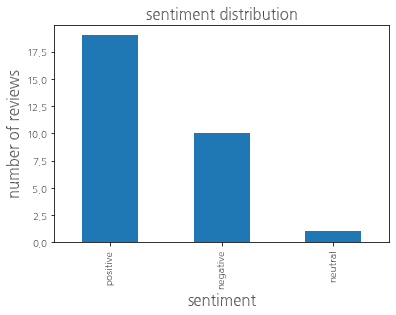

In [15]:
result['sentiment'].value_counts( ).plot(kind='bar') #sentiment별 빈도수로 bar차트 생성

plt.title('sentiment distribution', fontsize=15)
plt.xlabel('sentiment',fontsize=15)
plt.ylabel('number of reviews',fontsize=15 )   
plt.show()


In [16]:
print("긍정판별 리뷰 개수 :", len(result['sentiment'][result['sentiment']=="positive"]))
result['tokens'][result['sentiment']== "positive"][:10]  # 10개 긍정 리뷰 보여주기 

긍정판별 리뷰 개수 : 19


1     [생각, 재밌게, 봤네요, 개인, 조니, 음악, 마지막, 곡, 제일, 좋았어요, 의...
2               [개인, 편, 좋았음, 노래, 영화, 어울리게, 선곡, 잘한, 같아요]
3                      [아침, 조조, 봤는데, 편도, 재밌네요, 노래, 좋았다]
4                           [전편, 훨씬, 발전, 편, 노래, 진짜, 좋음]
5                               [느슨한, 영화계, 긴장감, 주는, 영화]
8                                          [노래, 감동, 최고]
11      [입, 떡, 벌어지는, 공연, 연출, 감탄, 새해, 영화로, 최고, 선택, 이었네요]
15                        [씽, 보다, 재밌었어요, 도, 나왔으면, 좋겠어요]
17                                [편, 좀, 탄탄해진, 느낌, 좋아요]
19                                [루미, 네이션, 최고, 음악, 영화]
Name: tokens, dtype: object

In [17]:
print("부정판별 리뷰 개수 :", len(result['sentiment'][result['sentiment']=="negative"]))
result['tokens'][result['sentiment']== "negative"][:10] # 10개 부정 리뷰 보여주기 

부정판별 리뷰 개수 : 10


6                             [시간, 가는, 줄, 모르게, 관람, 했어요]
7                              [믿고, 듣는, 씽, 노래, 너무, 좋아요]
9                                  [아들, 너무, 재미있게, 봤습니다]
10    [뻔한, 이야기, 남녀, 노소, 없이, 즐거운, 시간, 시간, 선사, 해주는, 흥겨...
12                                      [최고, 진부하지, 않아요]
13     [차, 관람, 노래, 듣다, 울컥울컥, 하는데, 보고, 나면, 기분, 좋아지는, 영화]
14                     [버스터, 고생, 너무, 너무, 너무, 재밌게, 봤습니다]
16      [너무, 신나게, 본, 영화, 노래, 아직도, 귀, 맴, 소리, 빵빵, 상영, 추천]
18                                    [영화, 보는, 내내, 즐겁다]
25                 [화려한, 콘서트, 초대, 받은, 기분, 즐거운, 시간, 이었다]
Name: tokens, dtype: object

## 3 워드 클라우드 만들기

리뷰에 많이 사용된 단어들을 분석하고 워드 클라우드로 시각화 



In [51]:
# Word Cloud를 만들기 위해 필요한 패키지를 설치합니다. 
!pip install wordcloud

In [18]:
#워드 클라우드 분석에 필요한 패키지를 불러옵니다.
from wordcloud import WordCloud

In [19]:
from collections import Counter 

# 앞서 분석한 토큰들을 words_for_cloud 라는 하나의 리스트로 합침 
words_for_cloud = []
for i in range(0,len(result)):
    token_list = result['tokens'][i]
    words_for_cloud = words_for_cloud + token_list

# 가장 많이 사용된 top 10 단어와 빈도수 출력
frequency = Counter(words_for_cloud).most_common(10)  
print(frequency)

[('노래', 9), ('영화', 8), ('너무', 6), ('최고', 6), ('편', 5), ('감동', 4), ('시간', 4), ('개인', 3), ('음악', 3), ('마지막', 3)]


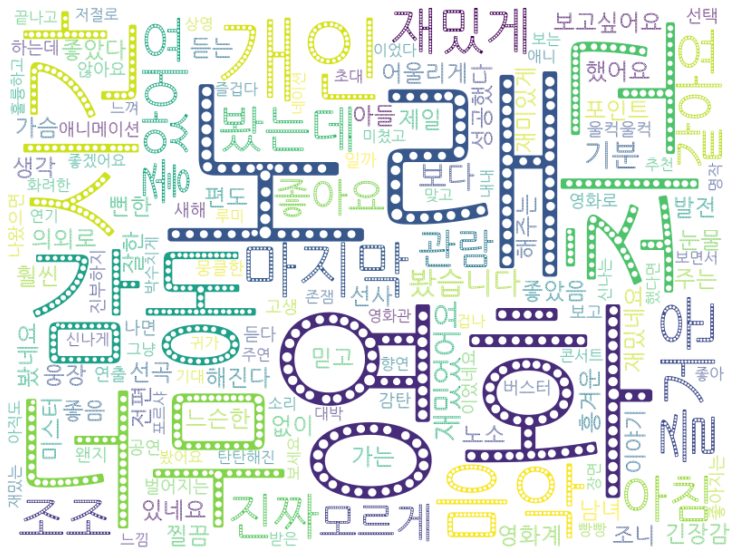

In [20]:
# 리스트를 문자열 형태로 변환 
words_for_cloud_string = " ".join(words_for_cloud) 

# 워드클라우드 환경 설정합니다. (폰트, 그림 크기, 배경색)
wc = WordCloud(font_path=path, width=800, height=600, background_color = "white")
wordcloud = wc.generate(words_for_cloud_string)
fig = plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear') # bilinear:부드럽게, none:이미지를 있는 그대로 보여주기
plt.axis("off")
plt.show()

## 4 토픽 모델링 (topic modeling)

- 문서의 집합에서 토픽을 찾아내는 프로세스로 검색 엔진, 고객 민원 시스템 등과 같이 문서의 주제를 알아내는 일이 중요한 곳에서 사용됨
- 잠재 디리클레 할당(Latent Dirichlet Allocation, LDA)은 토픽 모델링의 대표적인 알고리즘임 
- LDA는 문서들은 토픽들의 혼합으로 구성되어져 있으며, 토픽들은 확률 분포에 기반하여 단어들을 생성한다고 가정함. 데이터가 주어지면 LDA는 문서가 생성되던 과정을 역추적함

#### scikit-learn 패키지 이용

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000) # 상위 1,000개의 단어를 보존 

# tokenizer: 한글형태소 분석기를 사용하기 위해서는 별도의 함수를 만들어 지정해 주어야 함
# -- 예제 코드
#okt = Okt()
#def tw_tokenizer(text):
#    tokens_ko = okt.morphs(text)
#    return tokens_ko

#vectorizer = TfidfVectorizer(tokenizer = tw_tokenizer, ngram_range=(1,2), min_df =3, max_df = 0.9)


X = vectorizer.fit_transform(result['review'])
X.shape # TF-IDF 행렬의 크기 확인

(30, 166)

In [29]:
from sklearn.decomposition import LatentDirichletAllocation

# 5개 토픽 추출
lda_model=LatentDirichletAllocation(n_components=5,learning_method='online',random_state=0, max_iter=1)
lda_top=lda_model.fit_transform(X)

print(lda_model.components_)  #토픽별 단어의 비중 
print(lda_model.components_.shape) 

[[1.24841565 0.88122537 1.0821646  0.77131737 0.83973012 0.96914079
  0.97110176 0.92416776 0.96710289 0.87566306 0.97599113 0.89766189
  0.65788047 0.96466623 1.15872779 0.83744902 1.02463199 1.05594268
  0.77806775 0.69763215 1.01452381 0.9497024  0.76619373 0.73822137
  0.80738646 0.81312449 0.78340257 0.83101751 0.7776024  0.87993789
  0.84578046 0.88336487 0.79782612 0.86453434 0.78401835 0.71596501
  0.72312647 0.96873988 0.96827805 0.85884932 0.98721151 0.85236492
  0.82326722 0.852785   0.75708162 0.98964267 0.97379174 0.72968774
  1.05378731 0.83366099 0.81578141 0.9517383  0.87737424 0.90679691
  0.85840907 0.94740565 0.78999678 1.01183511 0.86050844 0.78904543
  1.00944097 0.9240828  0.82649664 0.91509733 0.97170237 0.98758172
  0.87904776 0.76200229 0.87275526 1.02689694 0.81327697 1.00770202
  0.84028958 0.89283491 0.79753669 0.94984208 0.88066228 0.82474288
  0.86163314 0.96649939 0.82170171 1.00459066 0.84278505 0.99536943
  0.84047193 0.88662021 0.75852457 0.81303588 0.

In [30]:
terms = vectorizer.get_feature_names() # 단어 집합

def get_topics(components, feature_names, n=10):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n -1:-1]])
         
get_topics(lda_model.components_,terms)

Topic 1: [('1편보다', 1.25), ('같아요', 1.16), ('2편', 1.08), ('좋았어요', 1.07), ('최고의', 1.07), ('씽1보다', 1.07), ('고생했다', 1.06), ('대박', 1.05), ('재미있게', 1.05), ('울컥울컥', 1.04)]
Topic 2: [('음악영화', 1.2), ('봤습니다', 1.09), ('모르게', 1.09), ('재밌네요', 1.07), ('보세요', 1.07), ('진부하지', 1.06), ('없이', 1.06), ('1편보다', 1.05), ('일루미네이션', 1.05), ('봤는데', 1.04)]
Topic 3: [('생각보다', 1.12), ('맞고', 1.11), ('제일', 1.09), ('기분', 1.08), ('씽1보다', 1.08), ('좋았어요', 1.08), ('재밌게', 1.04), ('긴장감을', 1.02), ('느슨한', 1.02), ('초대', 1.02)]
Topic 4: [('최고네요', 1.09), ('귀가', 1.07), ('듣는', 1.06), ('관람', 1.05), ('즐겁다', 1.05), ('노래', 1.05), ('30분은', 1.02), ('눈과', 1.02), ('영화', 1.01), ('화려한', 1.01)]
Topic 5: [('탑급주연', 1.09), ('재밌었어요3도', 1.06), ('영화계에', 1.05), ('맴도네요', 1.04), ('영화에요', 1.04), ('가슴이', 1.03), ('듣는', 1.02), ('맞고', 1.01), ('연기만', 1.01), ('최고네요', 1.0)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### Gensim 패키지 이용
- 토픽 모델링과 자연어 처리를 위한 오픈 소스 라이브러리 
- 단어의 문맥적 의미, 유사도를 반영한 벡터를 생성하기 때문에 성능이 좋음
- https://radimrehurek.com/gensim/models/word2vec.html

In [58]:
# 텍스트 분석을 위한 다양한 기능을 제공하는 gensim 패키지 이용
!pip install -U gensim

#!pip install gensim
#!pip install --upgrade pandas==1.2

In [31]:
import gensim
from gensim import corpora

In [32]:
topic = 3      # 추출할 토픽의 개수
keyword = 10   # 각 토픽에 포함할 키워드(단어) 개수

# LDA 토픽모델링 수행
dictionary = corpora.Dictionary(list(result['tokens']))    
corpus = [dictionary.doc2bow(text) for text in list(result['tokens'])]
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=topic, id2word = dictionary, passes=10)

topic_list = []  # 추출된 토픽과 토픽에 포함된 키워드 저장
for num in range(topic):
    topic_list.append(ldamodel.show_topic(num, keyword))

In [33]:
# 추출된 토픽과 키워드 출력
for index in range(len(topic_list)):
    print("# 주제", index + 1)
    for topic in topic_list[index]:
        print("\t", topic[0].split("/")[0])

# 주제 1
	 너무
	 노래
	 영화
	 씽
	 봤는데
	 도
	 아침
	 조조
	 재밌었어요
	 보다
# 주제 2
	 영화
	 노래
	 편
	 음악
	 관람
	 감동
	 최고
	 개인
	 좋아요
	 기분
# 주제 3
	 최고
	 시간
	 감동
	 즐거운
	 마지막
	 좋았어요
	 모르게
	 노소
	 없이
	 뻔한


In [62]:
# LDA토픽모델링 결과를 시각화하는 pyLDAvis 패키지 설치
!pip install pyLDAvis

In [34]:
import pyLDAvis.gensim_models

# LDA 토픽 모델링 시각화
pyLDAvis.enable_notebook()
lda_display = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary, sort_topics=True)
pyLDAvis.display(lda_display)

# 그래프의 분포를 확인하며 토픽의 개수 조정
# Intertopic Distance Map의 각 주제가 겹치지 않고 잘 구분되면 적절한 토픽개수라고 볼 수 있음

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [41]:
## 최적의 토픽수 구하기 (perlexity 값이 작을수록, coherence 값은 클수록 좋음)
from gensim.models import LdaModel
from gensim.models import CoherenceModel

num_topics: 1, perplexity: -5.248, coherence: -18.297
num_topics: 2, perplexity: -5.637, coherence: -17.067
num_topics: 3, perplexity: -5.697, coherence: -15.800
num_topics: 4, perplexity: -5.749, coherence: -13.587
num_topics: 5, perplexity: -5.830, coherence: -12.236
num_topics: 6, perplexity: -5.870, coherence: -14.583
num_topics: 7, perplexity: -5.854, coherence: -12.774
num_topics: 8, perplexity: -5.916, coherence: -15.190
num_topics: 9, perplexity: -5.979, coherence: -16.214
num_topics: 10, perplexity: -6.120, coherence: -16.520
num_topics: 11, perplexity: -6.081, coherence: -16.502
num_topics: 12, perplexity: -6.062, coherence: -15.749
num_topics: 13, perplexity: -6.152, coherence: -15.972
num_topics: 14, perplexity: -6.204, coherence: -16.046
num_topics: 15, perplexity: -6.146, coherence: -17.748
num_topics: 16, perplexity: -6.086, coherence: -16.716
num_topics: 17, perplexity: -6.124, coherence: -16.608
num_topics: 18, perplexity: -6.259, coherence: -16.772
num_topics: 19, per

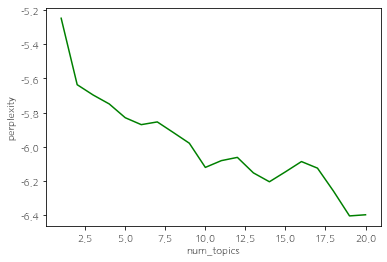

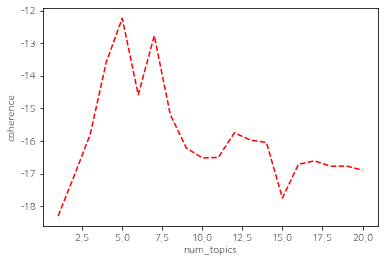

In [43]:
def show_per_coh(corpus, dictionary, start=6, end=15):
    iter_num = []
    per_value = []
    coh_value = []

    for i in range(start, end + 1):
        model = LdaModel(corpus=corpus, id2word=dictionary,
                 chunksize=1000, num_topics=i,
                 random_state=7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)
        per_value.append(pv)
        
        cm = CoherenceModel(model=model, corpus=corpus, 
                            coherence='u_mass')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')

    plt.rcParams['axes.unicode_minus'] = False  ## 마이너스 부호가 깨지는 것 방지 
    
    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel("num_topics")
    plt.ylabel("perplexity")
    plt.show()

    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("num_topics")
    plt.ylabel("coherence")
    plt.show()

show_per_coh(corpus, dictionary, start=1, end=20)